# Chapter3 텐서플로 프로그래밍

## 3.1 텐서와 그래프 실행

In [1]:
import tensorflow as tf

C:\Users\kist1\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
hello = tf.constant('Hello, Tensorflow!')

In [4]:
print(hello)

Tensor("Const_3:0", shape=(), dtype=string)


+ Tensor : n차원 array, list

+ rank : array의 차원

+ shape : array의 각 차원의 요소 수

+ dtype : 해당 Tensor에 담긴 요소들의 자료형 - string, int, float 등이 올 수 있음

In [6]:
a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a, b)
print(c)

Tensor("Add_1:0", shape=(), dtype=int32)


tf.add 실행결과로 42가 나오지 않고 텐서의 형태가 나온다. 그 이유는 텐서플로 프로그램이 구조가

1. 그래프 생성
2. 그래프 실행

으로 분리되어 있기 때문이다.

+ 그래프 : 텐서들의 연산 모음

+ 지연 실행(lazy evaluation) : 텐서와 텐서의 연산들을 먼저 정의하여 그래프를 만들고, 이후에 필요할 때 연산을 실행하는 코드를 넣어 원하는 시점에 실제 연산을 수행하도록 함

그래프의 실행은 Session 안에서 이루어 진다.

In [7]:
sess = tf.Session()

print(sess.run(hello))
print(sess.run([a,b,c]))

sess.close()

b'Hello, Tensorflow!'
[10, 32, 42]


## 3.2 플레이스홀더와 변수

+ 플레이스홀더 : 그래프에 사용할 입력값을 나중에 받기 위해 사용하는 매개변수(parameter)

+ 변수 : 그래프를 최적화하는 용도로 텐서플로가(학습 함수들이) 학습한 결과를 갱신하기 위해 사용

In [11]:
# tf.placeholder: 계산을 실행할 때 입력값을 받는 변수로 사용합니다.
# None 은 크기가 정해지지 않았음을 의미합니다.
X = tf.placeholder(tf.float32, [None, 3])
print(X)

Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)


In [12]:
# X 플레이스홀더에 넣을 값 입니다.
# 플레이스홀더에서 설정한 것 처럼, 두번째 차원의 요소의 갯수는 3개 입니다.
x_data = [[1, 2, 3], [4, 5, 6]]

In [5]:
# tf.Variable: 그래프를 계산하면서 최적화 할 변수들입니다. 이 값이 바로 신경망을 좌우하는 값들입니다.
# tf.random_normal: 각 변수들의 초기값을 정규분포 랜덤 값으로 초기화합니다.
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([2, 1]))

In [6]:
# 입력값과 변수들을 계산할 수식을 작성합니다.
# tf.matmul 처럼 mat* 로 되어 있는 함수로 행렬 계산을 수행합니다.
expr = tf.matmul(X, W) + b

In [9]:
sess = tf.Session()
# 위에서 설정한 Variable 들의 값들을 초기화 하기 위해
# 처음에 tf.global_variables_initializer 를 한 번 실행해야 합니다.
sess.run(tf.global_variables_initializer())

print("=== x_data ===")
print(x_data)
print("=== W ===")
print(sess.run(W))
print("=== b ===")
print(sess.run(b))
print("=== expr ===")
# expr 수식에는 X 라는 입력값이 필요합니다.
# 따라서 expr 실행시에는 이 변수에 대한 실제 입력값을 다음처럼 넣어줘야합니다.
print(sess.run(expr, feed_dict={X: x_data}))

sess.close()

=== x_data ===
[[1, 2, 3], [4, 5, 6]]
=== W ===
[[-0.52401257 -0.4044938 ]
 [-0.9084852  -0.07749461]
 [-0.4667885   0.2050284 ]]
=== b ===
[[-0.26481482]
 [ 0.74401605]]
=== expr ===
[[-4.006163   -0.20921269]
 [-8.695191   -0.03126192]]


+ feed_dict : 매개변수로 그래프를 실행할 때 사용할 입력값을 지정

+ X가 플레이스홀더, 여기에 데이터 값을 넣어줘야 실행이 된다.

# 3.3 선형 회귀 모델 구현하기

In [29]:
# 데이터 값 입력
x_data = [1, 2, 3]
y_data = [1, 2, 3]

In [30]:
# W와 b를 U(-1,1)에서 랜덤하게 하나씩 뽑음
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

In [31]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run(W))
print(sess.run(b))

sess.close()

[0.16932154]
[-0.65113306]


In [32]:
# 자료를 입력받을 플레이스홀더를 설정
# name: 나중에 텐서보드등으로 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙여줍니다.
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")
print(X)
print(Y)

Tensor("X_1:0", dtype=float32)
Tensor("Y_1:0", dtype=float32)


In [33]:
# X 와 Y 의 상관 관계를 분석하기 위한 가설 수식을 작성합니다.
# y = W * x + b
# W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용했습니다.
hypothesis = W * X + b

In [36]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print(sess.run(hypothesis, feed_dict={X: x_data}))
sess.close()

[-0.80913067 -0.9600954  -1.1110601 ]


In [22]:
# 손실 함수를 작성합니다.
# mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [23]:
# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [24]:
# 비용을 최소화 하는 것이 최종 목표
train_op = optimizer.minimize(cost)

In [25]:
# 세션을 생성하고 초기화합니다.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # 최적화를 100번 수행합니다.
    for step in range(100):
        # sess.run 을 통해 train_op 와 cost 그래프를 계산합니다.
        # 이 때, 가설 수식에 넣어야 할 실제값을 feed_dict 을 통해 전달합니다.
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})

        print(step, cost_val, sess.run(W), sess.run(b))

    # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인해봅니다.
    print("\n=== Test ===")
    print("X: 5, Y:", sess.run(hypothesis, feed_dict={X: 5}))
    print("X: 2.5, Y:", sess.run(hypothesis, feed_dict={X: 2.5}))

0 0.69398785 [1.1622515] [-0.27369928]
1 0.020131372 [1.1202965] [-0.28386003]
2 0.011519536 [1.1215638] [-0.27520663]
3 0.010880898 [1.118187] [-0.2687908]
4 0.010362969 [1.1153954] [-0.26230744]
5 0.009870689 [1.1126161] [-0.25600412]
6 0.009401833 [1.1099094] [-0.24984974]
7 0.008955234 [1.1072673] [-0.24384354]
8 0.008529857 [1.1046886] [-0.23798172]
9 0.008124686 [1.1021719] [-0.23226084]
10 0.0077387523 [1.0997158] [-0.22667742]
11 0.0073711686 [1.0973186] [-0.22122827]
12 0.007021019 [1.0949793] [-0.21591008]
13 0.0066875294 [1.092696] [-0.21071978]
14 0.0063698585 [1.0904677] [-0.2056542]
15 0.006067291 [1.0882928] [-0.20071045]
16 0.0057790815 [1.0861704] [-0.1958855]
17 0.0055045807 [1.0840989] [-0.19117658]
18 0.00524311 [1.0820773] [-0.18658084]
19 0.004994056 [1.0801042] [-0.18209557]
20 0.004756835 [1.0781785] [-0.17771815]
21 0.0045308894 [1.0762992] [-0.17344594]
22 0.004315665 [1.074465] [-0.16927643]
23 0.0041106665 [1.0726749] [-0.16520715]
24 0.003915412 [1.0709279]

+ 손실값이 점점 줄어든다면 학습이 정상적으로 이뤄지고 있는 것이다.

+ 5와 2.5는 학습에 사용되지 않았던 값이다.

In [107]:
import csv

f = open('score.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
X = []
Y = []
for line in rdr:
    X.append(line[0])
    Y.append(line[1])
f.close() 

In [108]:
# W와 b를 U(-1,1)에서 랜덤하게 하나씩 뽑음
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

# 자료를 입력받을 플레이스홀더를 설정
# name: 나중에 텐서보드등으로 값의 변화를 추적하거나 살펴보기 쉽게 하기 위해 이름을 붙여줍니다.
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

# X 와 Y 의 상관 관계를 분석하기 위한 가설 수식을 작성합니다.
# y = W * x + b
# W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용했습니다.
hypothesis = W * X + b

# 손실 함수를 작성합니다.
# mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

# 비용을 최소화 하는 것이 최종 목표
train_op = optimizer.minimize(cost)

# 세션을 생성하고 초기화합니다.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # 최적화를 100번 수행합니다.
    for step in range(100):
        # sess.run 을 통해 train_op 와 cost 그래프를 계산합니다.
        # 이 때, 가설 수식에 넣어야 할 실제값을 feed_dict 을 통해 전달합니다.
        _, cost_val = sess.run([train_op, cost], feed_dict={X: x_data, Y: y_data})

        print(step, cost_val, sess.run(W), sess.run(b))

    # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인해봅니다.
    print("\n=== Test ===")
    print("X: 30, Y:", sess.run(hypothesis, feed_dict={X: 30}))
    print("X: 10, Y:", sess.run(hypothesis, feed_dict={X: 10}))

0 0.6495715 [1.2783499] [-0.54327965]
1 0.051832538 [1.2358686] [-0.54596364]
2 0.042598892 [1.23411] [-0.53111833]
3 0.040494535 [1.2280546] [-0.51853865]
4 0.03857005 [1.222619] [-0.5060528]
5 0.036737926 [1.2172624] [-0.49388987]
6 0.03499286 [1.2120401] [-0.48201686]
7 0.033330675 [1.2069427] [-0.47042954]
8 0.03174745 [1.201968] [-0.45912072]
9 0.030239403 [1.1971128] [-0.44808376]
10 0.028803019 [1.1923743] [-0.43731213]
11 0.027434854 [1.1877497] [-0.42679945]
12 0.02613164 [1.1832365] [-0.41653943]
13 0.02489038 [1.1788316] [-0.40652612]
14 0.023708075 [1.1745325] [-0.39675352]
15 0.02258194 [1.1703368] [-0.38721582]
16 0.021509277 [1.1662421] [-0.3779074]
17 0.020487567 [1.1622458] [-0.36882278]
18 0.019514387 [1.1583455] [-0.35995653]
19 0.018587433 [1.154539] [-0.35130343]
20 0.017704524 [1.150824] [-0.34285834]
21 0.01686353 [1.1471983] [-0.33461624]
22 0.016062524 [1.1436597] [-0.32657233]
23 0.01529953 [1.1402062] [-0.31872174]
24 0.014572785 [1.1368358] [-0.31105986]
25 

# Scikit-Learn 패키지를 사용한 선형회귀분석

In [66]:
import csv
f = open('score.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
X = []
Y = []
for line in rdr:
    X.append(line[0])
    Y.append(line[1])
f.close() 

In [87]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array(X).astype("float64").reshape(-1, 1)
Y = np.array(Y).astype("float64").reshape(-1, 1)
model = LinearRegression().fit(X, Y)

In [88]:
model.coef_

array([[1.06512884]])

In [89]:
model.intercept_

array([-1.9520264])

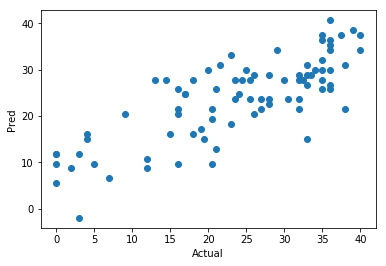

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
predictions = model.predict(X)

plt.scatter(Y, predictions)
plt.xlabel("Actual")
plt.ylabel("Pred")
plt.show()

In [94]:
model.predict(30)

array([[30.00183874]])

In [95]:
model.predict(10)

array([[8.69926198]])

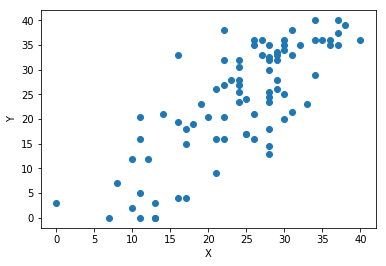

In [91]:
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Boston dataset

In [71]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

In [55]:
model_boston.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

In [56]:
model_boston.intercept_

36.49110328036198

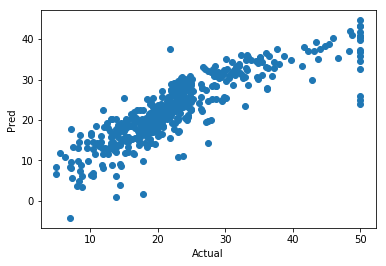

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel("Actual")
plt.ylabel("Pred")
plt.show()